# IMDB Top 1000 Movies Analysis

This project explores trends in the IMDB Top 1000 movies dataset. The analysis includes genre distribution, top directors, trends over time, and characteristics of high-rated movies.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [4]:
df = pd.read_csv('imdb_top_1000.csv')

## Data Preprocessing

In [6]:
# Remove rows with missing ratings and invalid years
df.dropna(subset=['IMDB_Rating'], inplace=True)
df['Released_Year'] = pd.to_numeric(df['Released_Year'].str.extract(r'(\d{4})')[0], errors='coerce')
df.dropna(subset=['Released_Year'], inplace=True)
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = pd.to_numeric(df['Runtime'].str.replace('min', '').str.strip())

## Objective 1: Distribution of Movies Across Genres

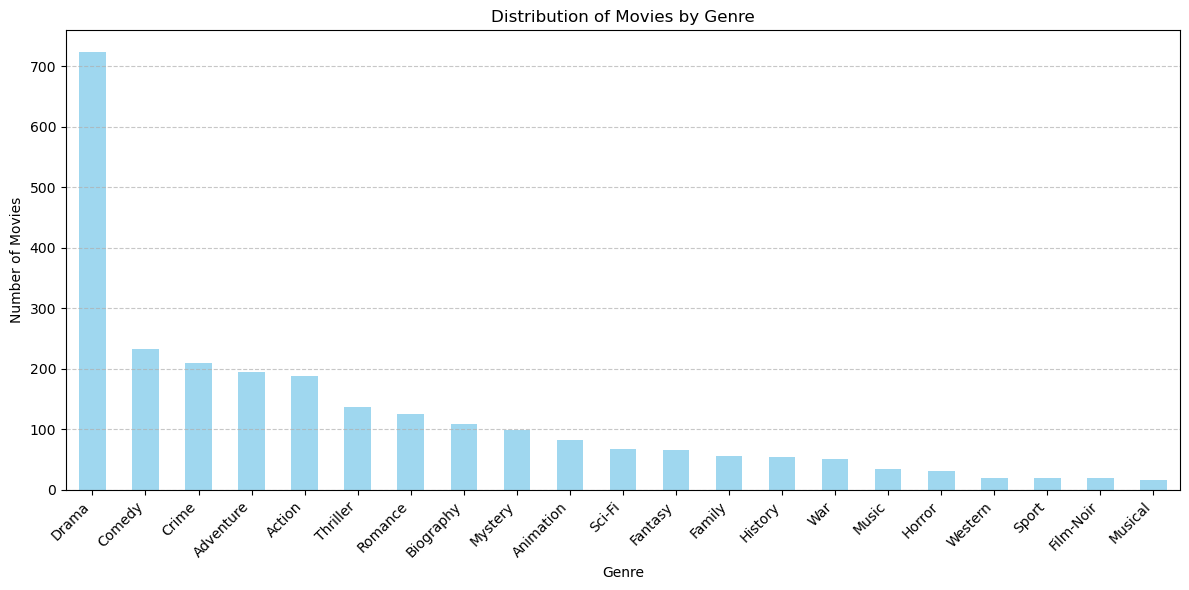

In [8]:
genre_counts = df['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Objective 2: Top Directors by Number of Movies

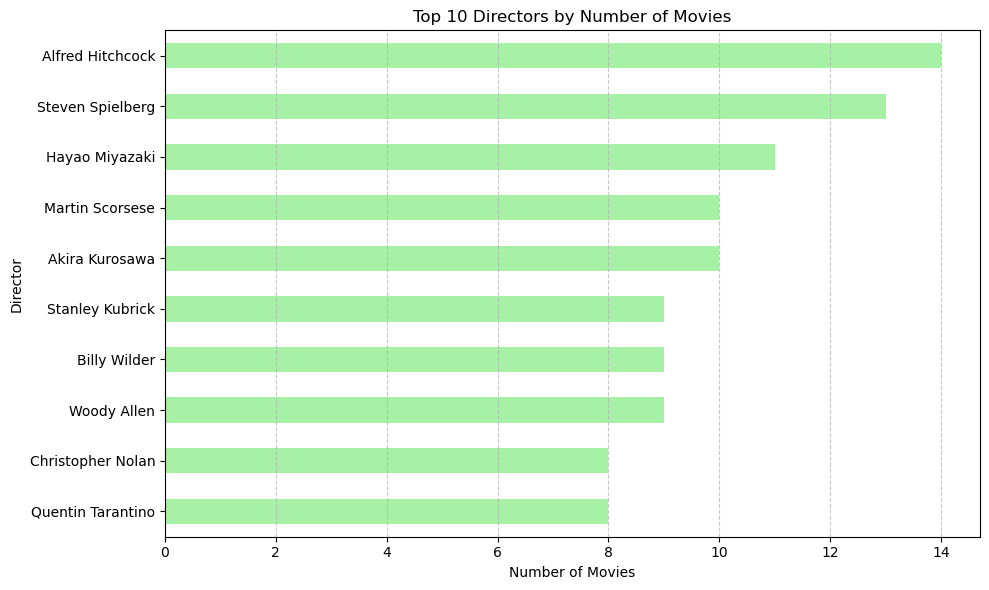

In [10]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='barh', color='lightgreen', alpha=0.8)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Objective 3: Trends Over Time

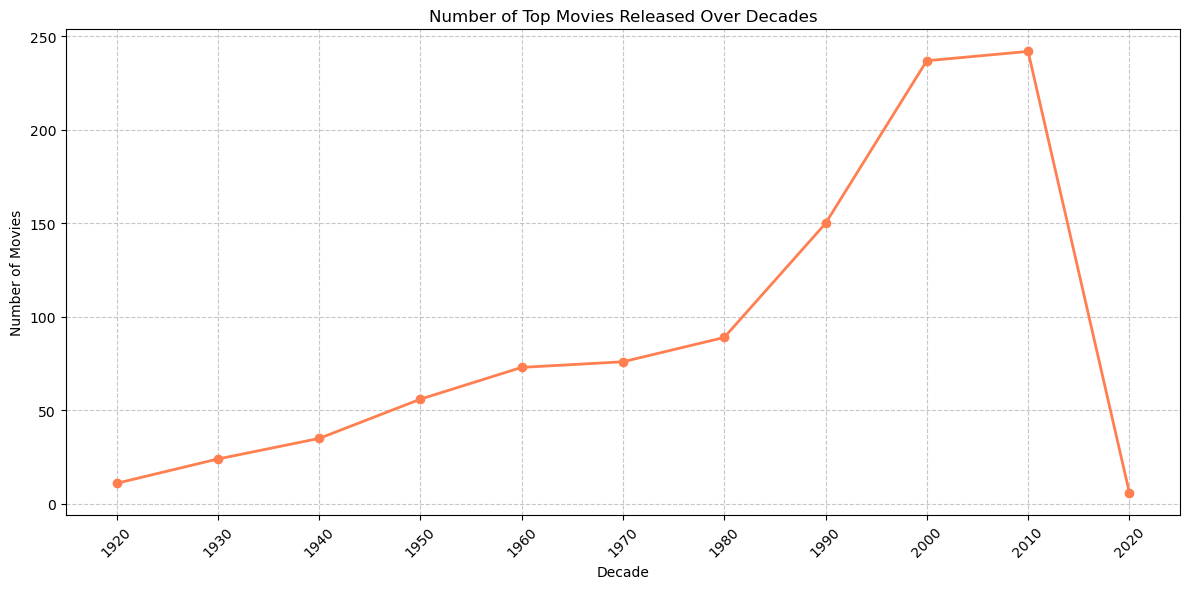

In [12]:
movies_per_decade = df.groupby((df['Released_Year'] // 10) * 10).size()
plt.figure(figsize=(12, 6))
movies_per_decade.plot(kind='line', marker='o', color='coral', linewidth=2)
plt.title('Number of Top Movies Released Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(movies_per_decade.index, rotation=45)
plt.tight_layout()
plt.show()

## Objective 4: Characteristics of High-Rated Movies

/var/folders/6y/h4bfw5sj1c1dr0wpg_4w9pvh0000gn/T/ipykernel_5570/1284128910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_rated, x='Genre', y='Runtime', palette='coolwarm', showfliers=False)


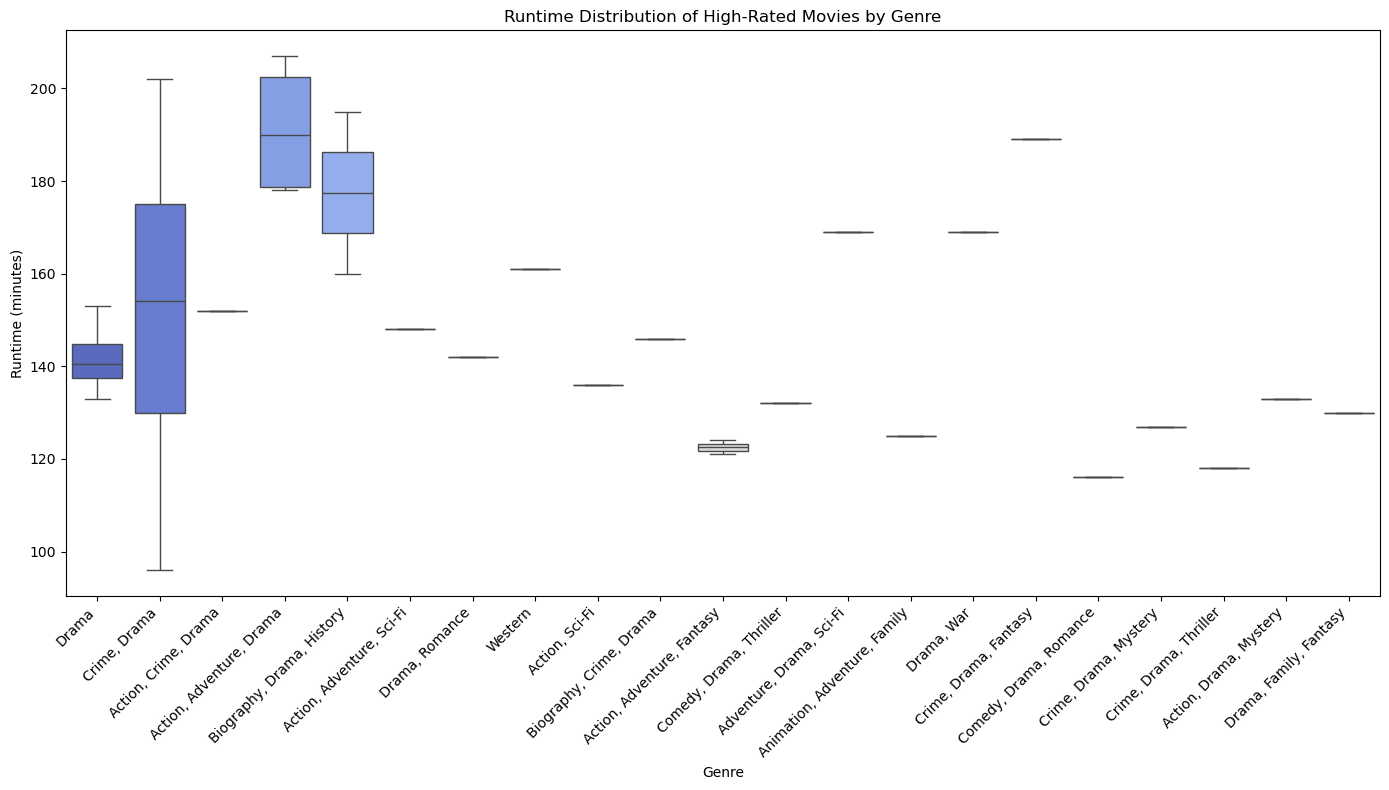

In [14]:
high_rated = df[df['IMDB_Rating'] > 8.5]
plt.figure(figsize=(14, 8))
sns.boxplot(data=high_rated, x='Genre', y='Runtime', palette='coolwarm', showfliers=False)
plt.title('Runtime Distribution of High-Rated Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()